In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gai shi dao wang,1969


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [7]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 15
Maya                    12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Othello                 11
She                     10
Paradise                10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [8]:
t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937    1203
1936    1144
1938    1141
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

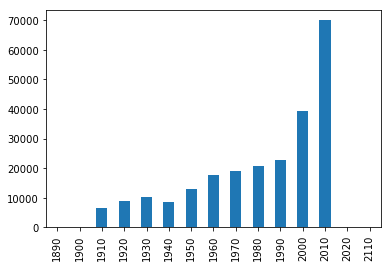

In [10]:
t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

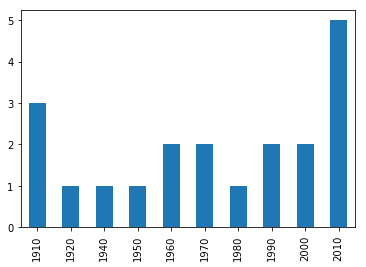

In [11]:
t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

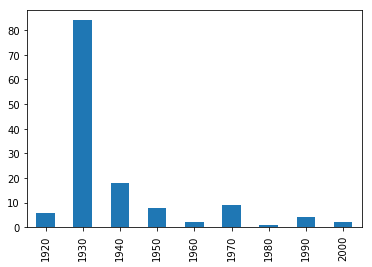

In [17]:
c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

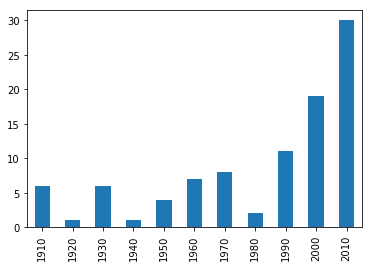

In [18]:
c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [14]:
cast.character.value_counts().head(11)

Himself        20789
Dancer         12283
Extra          11682
Reporter        8343
Student         7630
Doctor          7605
Party Guest     7074
Policeman       6994
Nurse           6829
Bartender       6762
Herself         6570
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [20]:
c = cast
c[c.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II    12
Joyce Brothers         9
Margaret Thatcher      9
Laura (II) M?gica      9
Mary Jo Pehl           9
Estrella Borja         8
In?s J. Southern       8
Marina Revilla         8
Marta Berrocal         8
?ngela Silv?n          7
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [21]:
c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler          99
Richard Nixon         46
Ronald Reagan         40
John F. Kennedy       36
George W. Bush        25
Winston Churchill     23
Ron Jeremy            23
Martin Luther King    22
Benito Mussolini      22
Bill Clinton          22
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [24]:
c = cast
c[c.year == 1945].name.value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    32
Bess Flowers       29
Harold Miller      29
Franklyn Farnum    27
Frank O'Connor     27
Nolan Leary        27
Herman Hack        25
Larry Steers       25
Pierre Watkin      24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [25]:
c = cast
c[c.year == 1985].name.value_counts().head(10)

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Lou Scheimer     15
Mohanlal         15
Aruna Irani      15
Raj Babbar       15
Rajesh Khanna    13
Deven Verma      13
Om Shivpuri      13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

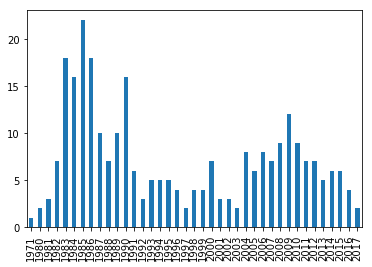

In [26]:
c = cast
c = c[c.name == 'Mammootty']
c.year.value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [29]:
c = cast
c = c[c.character.str.startswith('Patron in')]
c.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [30]:
c = cast
c = c[c.character.str.startswith('Science')]
c.character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Promo Cadet      5
Science Fair Judge       5
Science Club Member      5
Science Kid              5
Science Reporter         5
Science Fair Kid         4
Science                  4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

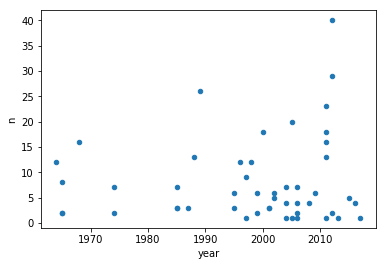

In [31]:
c = cast
c = c[c.name == 'Judi Dench'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x = 'year', y = 'n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

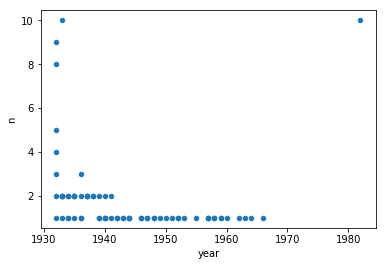

In [32]:
c = cast
c = c[c.name == 'Cary Grant'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x = 'year', y = 'n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

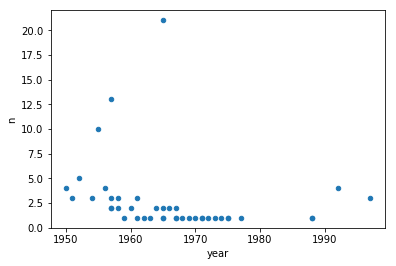

In [33]:
c = cast
c = c[c.name == 'Sidney Poitier'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x = 'year', y = 'n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [34]:
c = cast
c = c[c.type == 'actor']
c = c[c.n == 1]
c = c[c.year // 10 == 195]
len(c)

6696

In [35]:
c = cast
c = c[c.type == 'actress']
c = c[c.n == 1]
c = c[c.year // 10 == 195]
len(c)

3003

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [36]:
c = cast
c = c[c.type == 'actor']
c = c[c.n == 2]
c = c[c.year // 10 == 195]
len(c)

4623

In [37]:
c = cast
c = c[c.type == 'actress']
c = c[c.n == 2]
c = c[c.year // 10 == 195]
len(c)

4607